/tmp/ipykernel_84852/1460085093.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 10**7)
/tmp/ipykernel_84852/1460085093.py:66: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 10**7)


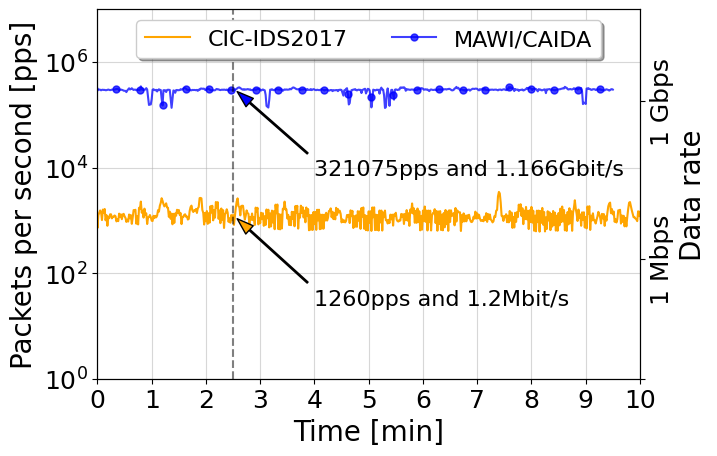

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_figwidth(7)
ax2 = ax1.twinx()

# Read the data
df_caida = pd.read_csv("../data/training/mawi_ddos_0_1.0.csv")
for i in range(1,11):
    df_caida = pd.concat([df_caida, pd.read_csv(f"../data/training/mawi_ddos_{i}_1.0.csv")], ignore_index=True, axis=0)
xs_caida = df_caida.index.values
ys_caida = df_caida["Packet count"].values

#get all indices of ys where ys[i] < 10
indices = [i for i, x in enumerate(ys_caida) if x < 100]
#delete all indices from ys and xs
ys_caida = np.delete(ys_caida, indices)
xs_caida = np.delete(xs_caida, indices)



df_cic = pd.read_csv("../data/training/cic_ddos_0_1.0.csv")
#take entries 60 to 660
df_cic = df_cic.iloc[0:660]
xs_cic = df_cic.index.values
ys_cic = df_cic["Packet count"].values
ys_cic = np.convolve(ys_cic, np.ones(3), 'valid') / 3

#caida average packet size is 496 bytes
#cic average packet size is 860 bytes
average_packet_size_caida = 496
average_packet_size_cic = 860
average_both = (average_packet_size_caida + average_packet_size_cic) / 2
average_bits_per_packet = average_both * 8


# Plot the data
plt.xlim(30, 630)
plt.xticks(np.arange(30, 660, 60), np.arange(0, 11, 1))

ax1.plot(np.arange(len(ys_cic)), ys_cic, linestyle="-", color="orange")
ax1.plot(xs_caida, ys_caida, linestyle="-", color="blue", marker="o", markersize=5, alpha=0.75, markevery=25)
ax1.set_yscale("log")
ax1.set_yticks([1, 10**2, 10**4, 10**6])
ax1.set_ylim(0, 10**7)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Packets per second [pps]", fontsize=20)
ax1.set_xlabel("Time [min]", fontsize=20)
ax1.grid(True, which="both", alpha=0.5)

ax1.annotate(f"{int(ys_cic[180])}pps and 1.2Mbit/s", xy=(180, ys_cic[180]), arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .2), textcoords='axes fraction', fontsize=16)
ax1.annotate(f"{int(ys_caida[180])}pps and 1.166Gbit/s", xy=(180, ys_caida[180]), arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .55), textcoords='axes fraction', fontsize=16)

ax1.axvline(x=180, color="black", linestyle="--", alpha=0.5)


ax2.set_yscale("log")
ax2.plot(xs_caida, ys_caida, alpha=0)
ax2.plot(np.arange(len(ys_cic)), ys_cic, alpha=0)
ax2.set_yticks([1, 10**6/average_bits_per_packet, 10**9/average_bits_per_packet], ["", "1 Mbps", "1 Gbps"], rotation=90, verticalalignment="center", fontsize=18)
ax2.set_ylim(0, 10**7)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel("Data rate", fontsize=20)

ax1.legend(["CIC-IDS2017", "MAWI/CAIDA"], fontsize=16, ncol=2, loc="upper center", shadow=True, fancybox=True)

#urrent datatime as string
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
filename = f"figures/packet_count_{dt_string}.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()

/tmp/ipykernel_84852/730718471.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**7)


<Figure size 640x400 with 0 Axes>

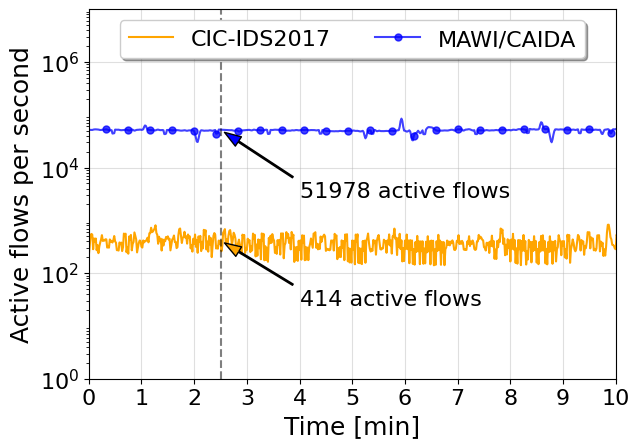

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure().set_figheight(4)
plt.figure().set_figwidth(6.8)
items_for_average = 3

# Read the data
df_caida = pd.read_csv("mawi-ddos/flow_churn_per_second_caida_0.csv")
for i in range(1,11):
    df_caida = pd.concat([df_caida, pd.read_csv(f"mawi-ddos/flow_churn_per_second_caida_{i}.csv")], ignore_index=True, axis=0)
ys_caida = df_caida.iloc[:,0].values
#get all indices of ys where ys[i] < 10
indices = [i for i, x in enumerate(ys_caida) if x < 100]
#delete all indices from ys and xs
ys_caida = np.delete(ys_caida, indices)
ys_caida = np.convolve(ys_caida, np.ones(items_for_average), 'valid') / items_for_average

# Read the data
df_cic = pd.read_csv("cic-ddos/flows_per_second_cic.csv")
ys_cic = df_cic.iloc[0:800,0].values

#average of 10 entries of ys_caida
ys_cic = np.convolve(ys_cic, np.ones(items_for_average), 'valid') / items_for_average

plt.plot(np.arange(len(ys_cic)), ys_cic, linestyle="-", color="orange")
plt.plot(np.arange(len(ys_caida)), ys_caida, linestyle="-", color="blue", marker="o", markersize=5, alpha=0.75, markevery=25)
plt.yscale("log")
plt.ylim(0, 10**7)
plt.yticks([1, 10**2, 10**4, 10**6], fontsize=16)
plt.xticks(np.arange(30, 660, 60), np.arange(0, 11, 1), fontsize=16)
plt.xlabel("Time [min]", fontsize=18)
plt.ylabel("Active flows per second", fontsize=18)
plt.xlim(30, 630)
plt.legend(["CIC-IDS2017", "MAWI/CAIDA"], fontsize=16, ncol=2, loc="upper center", shadow=True, fancybox=True)
plt.grid(True, which="major", alpha=0.4)

plt.annotate(f"{int(ys_cic[180])} active flows", xy=(180, ys_cic[180]), arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .2), textcoords='axes fraction', fontsize=16)
plt.annotate(f"{int(ys_caida[180])} active flows", xy=(180, ys_caida[180]), arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .49), textcoords='axes fraction', fontsize=16)

plt.axvline(x=180, color="black", linestyle="--", alpha=0.5)

#urrent datatime as string
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
filename = f"figures/active_flows_{dt_string}.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()

/tmp/ipykernel_84852/3599946188.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**7)


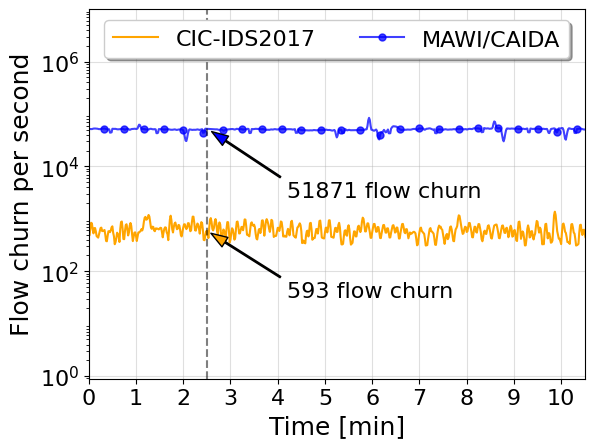

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_caida = pd.read_csv("mawi-ddos/flow_churn_per_second_caida_0.csv")
for i in range(1,12):
    df_caida = pd.concat([df_caida, pd.read_csv(f"mawi-ddos/flow_churn_per_second_caida_{i}.csv")], ignore_index=True, axis=0)
ys_caida = df_caida.iloc[:,0].values
#get all indices of ys where ys[i] < 10
indices = [i for i, x in enumerate(ys_caida) if x < 100]
#delete all indices from ys and xs
ys_caida = np.delete(ys_caida, indices)

# Read the data
df_cic_churn = pd.read_csv("cic-ddos/flow_churn_per_second_cic.csv")
ys_cic_churn = df_cic_churn.iloc[0:700,0].values

items_for_average = 3



#average of 10 entries of ys_caida
ys_cic_churn = np.convolve(ys_cic_churn, np.ones(items_for_average), 'valid') / items_for_average
ys_caida = np.convolve(ys_caida, np.ones(items_for_average), 'valid') / items_for_average

plt.yscale("log")
plt.ylim(0, 10**7)
plt.yticks([1, 10**2, 10**4, 10**6], fontsize=16)
plt.xlim(30, 660)
plt.xticks(np.arange(30, 660, 60), np.arange(0, 11, 1), fontsize=16)
plt.grid(True, which="major", alpha=0.4)

plt.plot(np.arange(len(ys_cic_churn)), ys_cic_churn, linestyle="-", color="orange")
plt.plot(np.arange(len(ys_caida)), ys_caida, linestyle="-", color="blue", marker="o", markersize=5, alpha=0.75, markevery=25)

plt.xlabel("Time [min]", fontsize=18)
plt.ylabel("Flow churn per second", fontsize=18)
plt.legend(["CIC-IDS2017", "MAWI/CAIDA"], fontsize=16, ncol=2, loc="upper center", shadow=True, fancybox=True)

plt.annotate(f"{int(ys_cic_churn[180])} flow churn", xy=(180, ys_cic_churn[180]), arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .22), textcoords='axes fraction', fontsize=16)
plt.annotate(f"{int(ys_caida[181])} flow churn", xy=(181, ys_caida[181]), arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=8),
             xytext=(0.4, .49), textcoords='axes fraction', fontsize=16)

plt.axvline(x=180, color="black", linestyle="--", alpha=0.5)

#urrent datatime as string
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
filename = f"figures/flow_churn_{dt_string}.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()
